### <center><font color = #03989e>DATA3001 - Protolytix 🧬</font></center>
<center><center><center><center><center><font color = #03989e>Dharani Palanisamy (z5260276)</font></center>
<center><center><center><center><font color = #03989e>Faiyam Islam (z5258151)</font></center></center></center></center>
<center><center><center><font color = #03989e>Hilary Cao (z5308506)</font></center></center></center>
<center><center><font color = #03989e>Kelly Tao (z5259876)</font></center></center>
<center><font color = #03989e>Pooja Saianand (z5312416)</font></center>

In [1]:
# pip install kneed

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Importing Packages</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import os

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Proteins dataset</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [3]:
data = pd.read_csv('AF-O43526-F1-model_v3.tsv', sep='\t', header=0)
df = pd.DataFrame(data)
df1 = df.drop(columns=['index', 'gamma', 'exp', 'obs'])
df1

,x,y,z
0,-3.512,-33.674,-14.723
1,-1.390,-34.119,-11.579
2,1.629,-36.312,-11.147
3,4.865,-35.872,-9.157
4,7.371,-38.625,-8.349
...,...,...,...
867,-12.577,-52.381,-22.296
868,-10.479,-51.784,-19.900
869,-6.981,-50.668,-18.703
870,-3.920,-51.828,-16.712


-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>K-Means Clustering Implementation</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [4]:
from sklearn.cluster import KMeans
def get_kmeans(data, k):
    kmeans = KMeans(k)
    iter = kmeans.fit(data)
    y_kmeans = iter.predict(data)
    return y_kmeans, iter

In [5]:
def get_labels(y_kmeans):        
        labels = y_kmeans

        from collections import Counter
        t = Counter(labels)
        y = []
        z = []
        for i in t:
                y.append(i)
                z.append(t[i])
        return labels, y, z

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Computing gamma value for each cluster</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
def find_gamma(labels, df, y, z):
    gammas = [] #stores the gamma value for each cluster calculated using avg ecpected and avg observed
    for i in y:
        index_val = y.index(i)
        total = z[index_val]
        sum_exp = 0
        sum_obs = 0
        for j in range(len(labels)):
            #get the sum of expected and observed values for each cluster
            if labels[j] == i:
                # Now get the expected and observed value for amino acid with index j
                expected_val = df.iloc[j,5]
                obs_Val = df.iloc[j,6]
                sum_exp += expected_val
                sum_obs += obs_Val
        #print(sum_obs,sum_exp)
        avg_exp = (sum_exp*1.0)/total
        avg_obs = (sum_obs*1.0)/total
        gamma_val = avg_obs/avg_exp
        gammas.append(gamma_val)
                
    #print(gammas)
    #find average  gamma value of the entire model
    sum_gamma = 0
    for i in gammas:
        sum_gamma += i
    avg_gamma = (sum_gamma*1.0/len(gammas))
    return avg_gamma, gammas

In [7]:
count = 0
min_gamma = 0
store_labels = 0
counter = 0
k_val = 0
min_gammas = []
# len(df1)
for min_val in range(2,8):
    y_kmeans, iter = get_kmeans(df1, min_val)
    # if counter == 0:
    #    plot_clusters(df1, iter, distances)
    #    counter = 1
    #plot_function(distances)
    #eps_Val = knee_val(distances)
    #for i in range(min_val, len(df1)):
    labels,y,z = get_labels(y_kmeans)
    if len(y) > 2:
        gamma_val, gammas = find_gamma(labels, df, y, z)
        if min_gamma == 0:
            min_gamma = gamma_val
            store_labels = labels
            k_val = min_val
            min_gammas = gammas
        elif gamma_val < min_gamma:
            min_gamma = gamma_val
            store_labels = labels
            k_val = min_val
            min_gammas = gammas

print(f"The minimum average gamma value of {min_gamma}")
print(f"The number of clusters produced by the K means clustering {k_val}")
print(min_gammas)
#print(f"Count of the data points in each cluster:{Counter(store_labels)}")
#print(store_labels)

The minimum average gamma value of 0.5148168889764874
The number of clusters produced by the K means clustering 5
[0.5726045458761635, 0.5595505228342995, 0.35283861775551695, 0.6278102968188481, 0.4612804615976084]


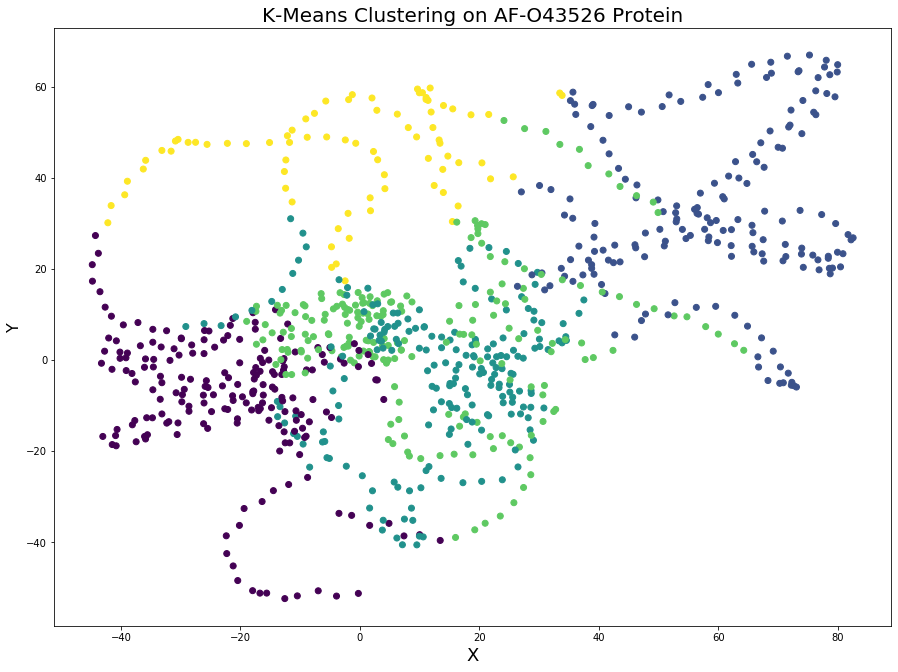

In [8]:
plt.figure(figsize=(15, 11))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1], c=store_labels, cmap='viridis')
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.title('K-Means Clustering on AF-O43526 Protein', fontsize=20)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Evaluation Metrics</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [10]:
X = df[['x', 'y', 'z']]
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7) 
for i in index: 
    kmeans = KMeans(n_clusters = i, random_state = 42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))
    
    print('At K =', i)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

At K = 2
Silhouette Coefficient: 0.322
Calinski-Harabasz Index: 458.568
Davies-Bouldin Index: 1.250
---------------------------------------------------------------
At K = 3
Silhouette Coefficient: 0.316
Calinski-Harabasz Index: 481.443
Davies-Bouldin Index: 1.121
---------------------------------------------------------------
At K = 4
Silhouette Coefficient: 0.308
Calinski-Harabasz Index: 455.841
Davies-Bouldin Index: 1.101
---------------------------------------------------------------
At K = 5
Silhouette Coefficient: 0.331
Calinski-Harabasz Index: 438.215
Davies-Bouldin Index: 0.987
---------------------------------------------------------------
At K = 6
Silhouette Coefficient: 0.324
Calinski-Harabasz Index: 426.495
Davies-Bouldin Index: 1.032
---------------------------------------------------------------


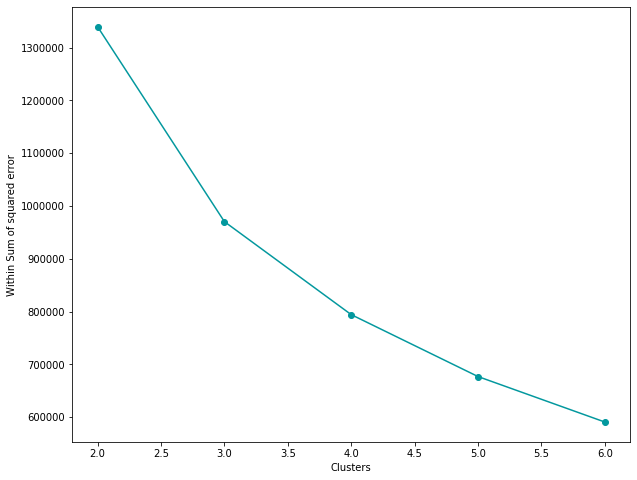

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(index, se, marker='o', color = "#03989e")
plt.xlabel('Clusters')
plt.ylabel('Within Sum of squared error')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
 
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.316
Calinski-Harabasz Index: 481.443
Davies-Bouldin Index: 1.121


In [13]:
# conda install -c districtdatalabs yellowbrick

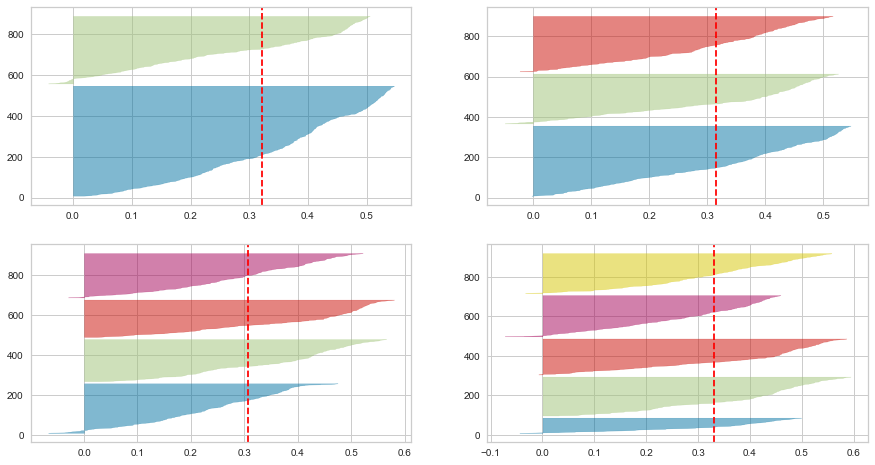

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42) 
    q, mod = divmod(i, 2) 
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

In [16]:
result = {}

for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, random_state = 42) 
    labels = kmeans.fit_predict(X) 
    db_index = silhouette_score(X, labels) 
    result.update({i : db_index})

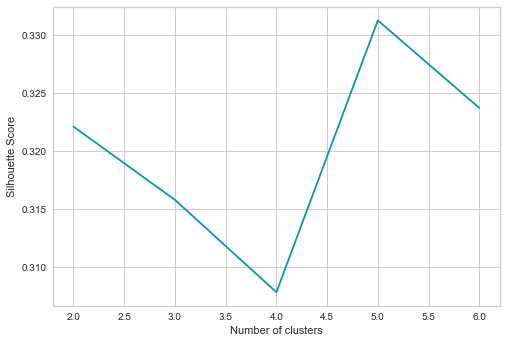

In [17]:
# Visualise 
plt.plot(list(result.keys()), list(result.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [18]:
results = {}

for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, random_state = 42) 
    labels = kmeans.fit_predict(X) 
    db_index = calinski_harabasz_score(X, labels) 
    results.update({i : db_index})

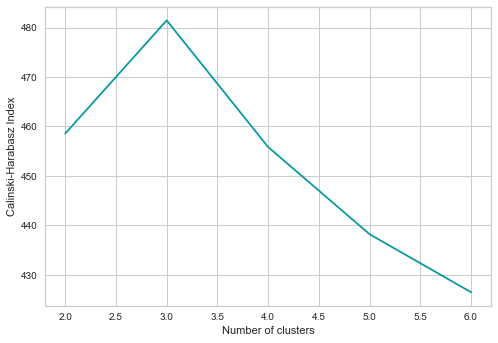

In [19]:
# Visualise 
plt.plot(list(results.keys()), list(results.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

In [21]:
res = {}

for i in range(2, 7):
    kmeans = KMeans(n_clusters = i, random_state = 42) 
    labels = kmeans.fit_predict(X) 
    db_index = davies_bouldin_score(X, labels) 
    res.update({i : db_index})

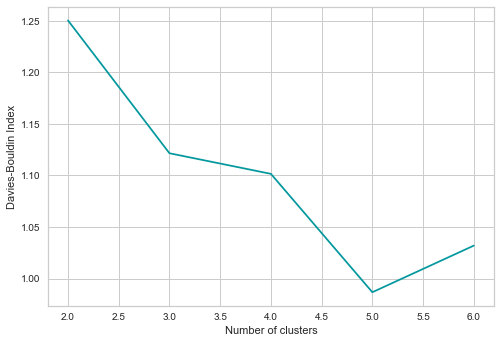

In [22]:
# Visualise 
plt.plot(list(res.keys()), list(res.values()), color = "#03989e")
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin Index")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>End of Notebook</font></center>
-------------------------------------------------------------------------------------------------------------------------------